<a href="https://colab.research.google.com/github/spacee48/SIT719/blob/main/5_1C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import any necessary libraries

In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the cybersecurity dataset

url = "https://raw.githubusercontent.com/incribo-inc/cybersecurity_attacks/refs/heads/main/cybersecurity_attacks.csv"
df = pd.read_csv(url)


1.1. Display the first few rows of the dataset with columns headers.

In [4]:
print("Dataset head")
print(df.head())

print("\nColumn Information")
print(df.info())

# reason: checking the first few rows helps in understanding the data structure and preparing for further cleaning

Dataset head
             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \

1.2. Handle Missing Values

In [5]:
print("\nMissing Values")
print(df.isnull().sum())


Missing Values
Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


In [6]:
df['Alerts/Warnings'].head()

,Alerts/Warnings
0,NaN
1,NaN
2,Alert Triggered
3,Alert Triggered
4,Alert Triggered


In [7]:
df['Alerts/Warnings'] = df['Alerts/Warnings'].fillna('No Alert Triggered')
df['Malware Indicators'] = df['Malware Indicators'].fillna('No IOC')
df['Firewall Logs'] = df['Firewall Logs'].fillna('No Logs')
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].fillna('No Alert Triggered')

df.isnull().sum()

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


In [8]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0], inplace=True)
  else:
    df[column].fillna(df[column].mean(), inplace=True)

# reason: filling missing values prevents errors during analysis and ensures models can be trained on complete data

<ipython-input-8-82ddddffea80>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-8-82ddddffea80>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [9]:
print("Missing Values After")
print(df.isnull().sum())

Missing Values After
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64


1.3. Analyze attacks by months and type

In [10]:
df['Month'] = pd.to_datetime(df['Timestamp']).dt.month
attack_by_month = df.groupby(['Month', 'Attack Type']).size().reset_index(name='Counts')

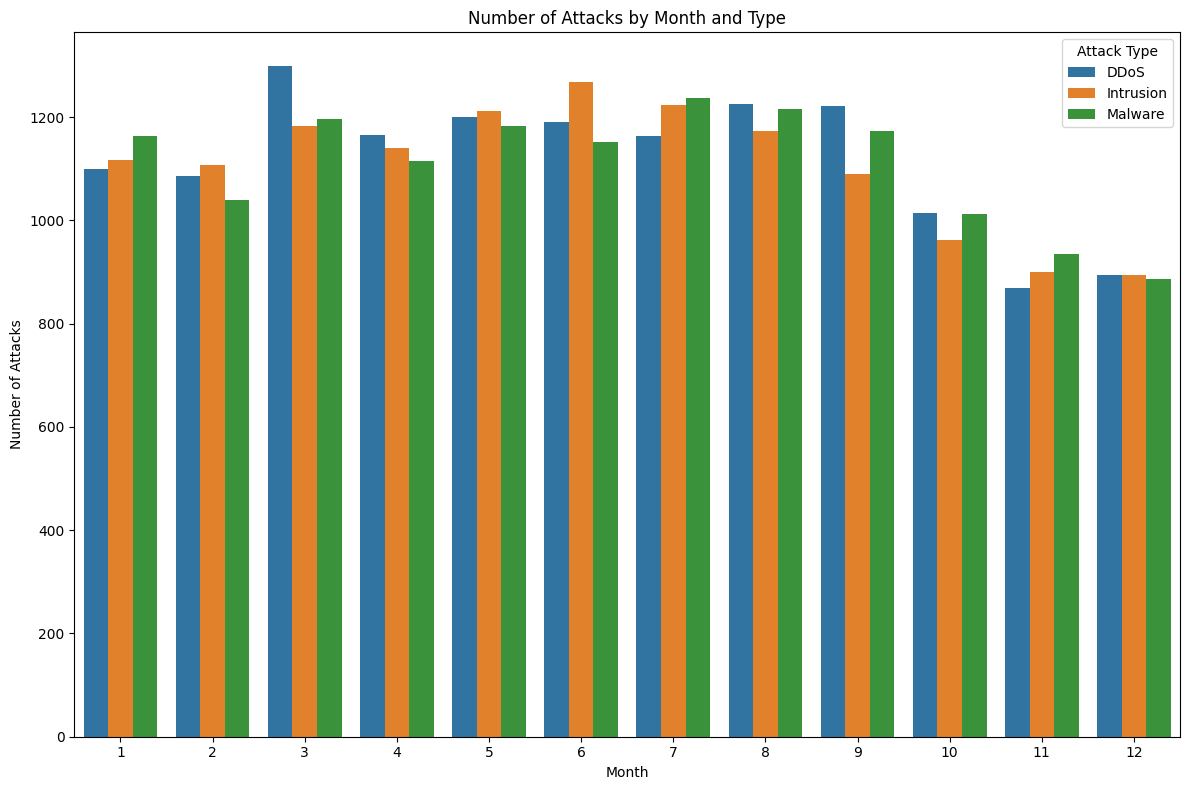

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Counts', hue='Attack Type', data=attack_by_month)
plt.title("Number of Attacks by Month and Type")
plt.xlabel("Month")
plt.ylabel("Number of Attacks")
plt.legend(title="Attack Type", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# reason: identifying which months are risker helps organisations allocate resources accordingly

1.4. Show the packet length distribution for different attack types

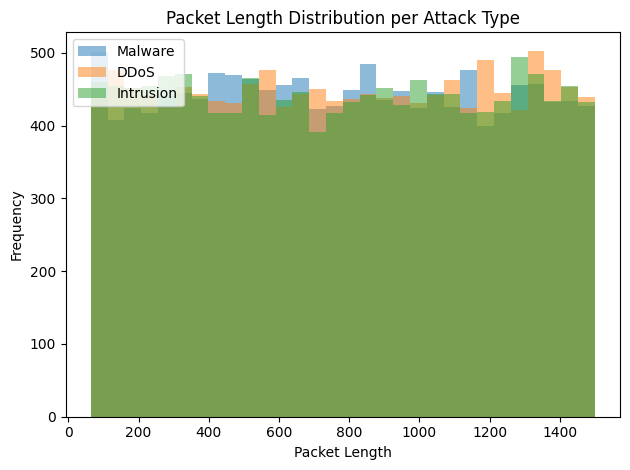

In [12]:
if 'Packet Length' in df.columns:
    attack_types = df['Attack Type'].unique()
    for attack in attack_types:
        subset = df[df['Attack Type'] == attack]
        plt.hist(subset['Packet Length'], bins=30, alpha=0.5, label=attack)

    plt.title("Packet Length Distribution per Attack Type")
    plt.xlabel("Packet Length")
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

# reason: different attacks may have unique packet size signatures, useful for anomaly detection

1.5. Provide 5 insights

Insight 1: The graphs below illustrate the distribution of Severity Levels across different Attack Types. They reveal that severity levels are fairly evenly distributed for each attack type, suggesting that severity may not be strongly associated with the attack type alone. Another possibility is that the dataset was intentionally balanced to support the training of machine learning models.

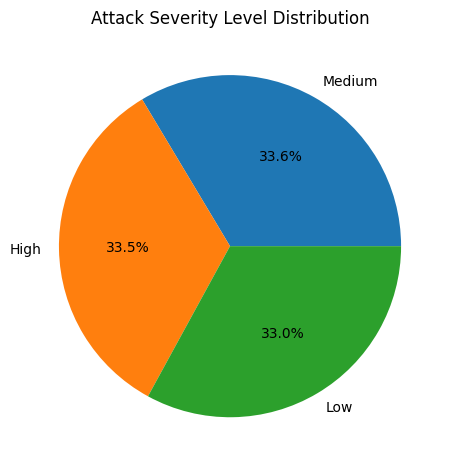

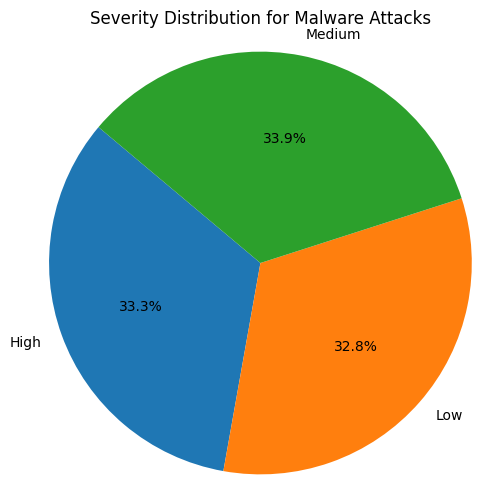

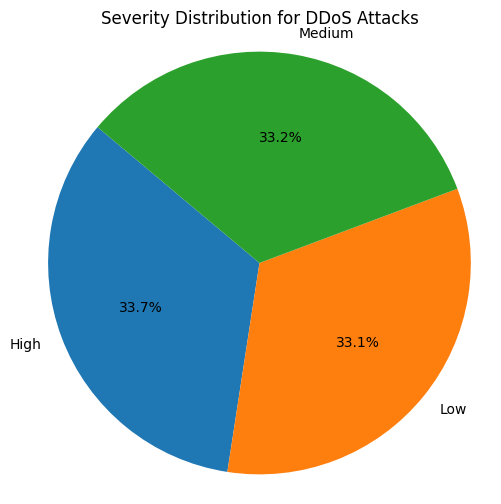

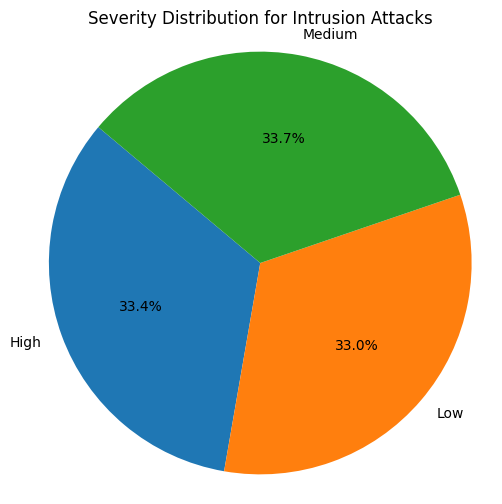

In [13]:
attack_types = df['Attack Type'].unique()
attack_severity_counts = df.groupby(['Attack Type', 'Severity Level']).size().reset_index(name='Count')

if 'Severity Level' in df.columns:
    severity_counts = df['Severity Level'].value_counts()
    severity_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title("Attack Severity Level Distribution")
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

for attack in attack_types:
  subset = attack_severity_counts[attack_severity_counts['Attack Type'] ==
  attack]
  labels = subset['Severity Level']
  sizes = subset['Count']
  plt.figure(figsize=(6, 6))
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
  plt.title(f'Severity Distribution for {attack} Attacks')
  plt.axis('equal')
  plt.show()

Insight 2: The bar plot reveals that Segment A and Segment B experience slightly higher attack volumes compared to other segments. By adjusting the y-axis to focus on the range between 13,000 and 13,500, minor differences become more apparent. This detailed view assists security teams in identifying which parts of the network architecture may require tighter controls or resource prioritization.

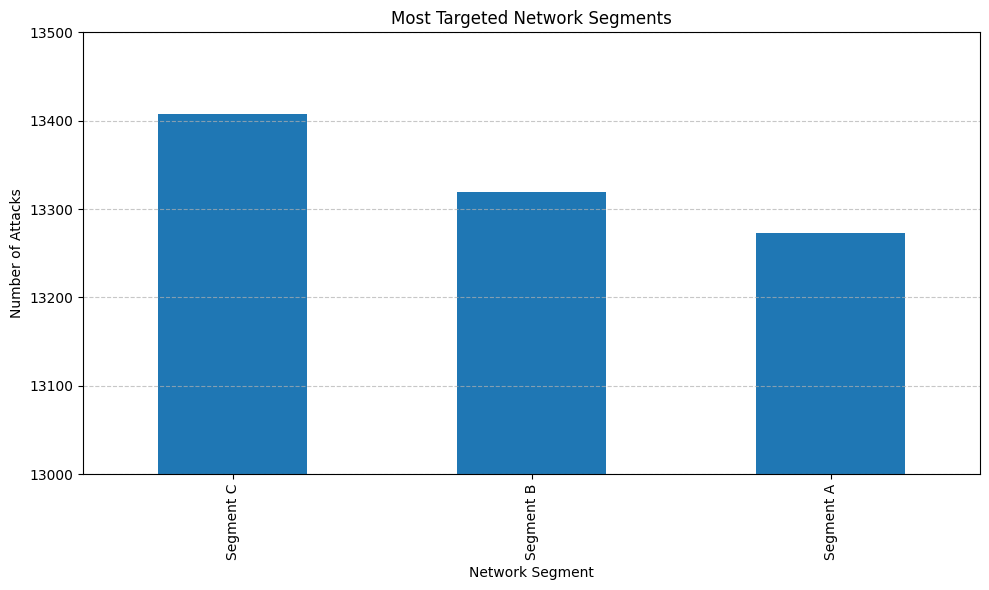

In [14]:
segment_counts = df['Network Segment'].value_counts()

plt.figure(figsize=(10,6))
segment_counts.plot(kind='bar')
plt.title('Most Targeted Network Segments')
plt.xlabel('Network Segment')
plt.ylabel('Number of Attacks')
plt.ylim(13000, 13500)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Insight 3: boxplot reveals that different traffic types exhibit distinct anomaly score distributions. HTTP traffic, for instance, shows a wide range of scores with several extreme outliers, suggesting irregular behaviors that could point to potential cyber threats. Meanwhile, other types like FTP show tighter distributions, indicating more consistent behavior. By analyzing these patterns, security analysts can prioritize monitoring efforts on traffic types that demonstrate higher variability and risk.

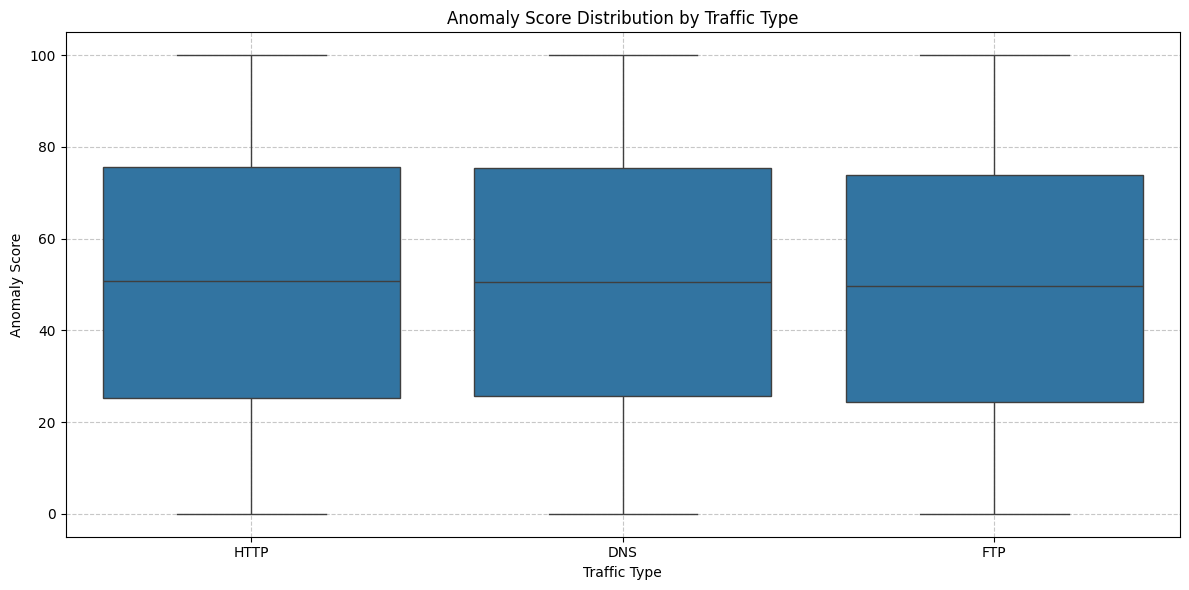

In [15]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Traffic Type', y='Anomaly Scores', data=df)

plt.title('Anomaly Score Distribution by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Anomaly Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Insight 4: The bar chart reveals distinct protocol usage patterns among attack types. For example, DDoS attacks heavily utilize the ICMP and UDP protocols, whereas malware attacks are predominantly associated with TCP traffic. Understanding the protocol preferences of different attack types can aid in developing targeted defense mechanisms, such as protocol-specific firewall rules or anomaly detection tuned by protocol type.


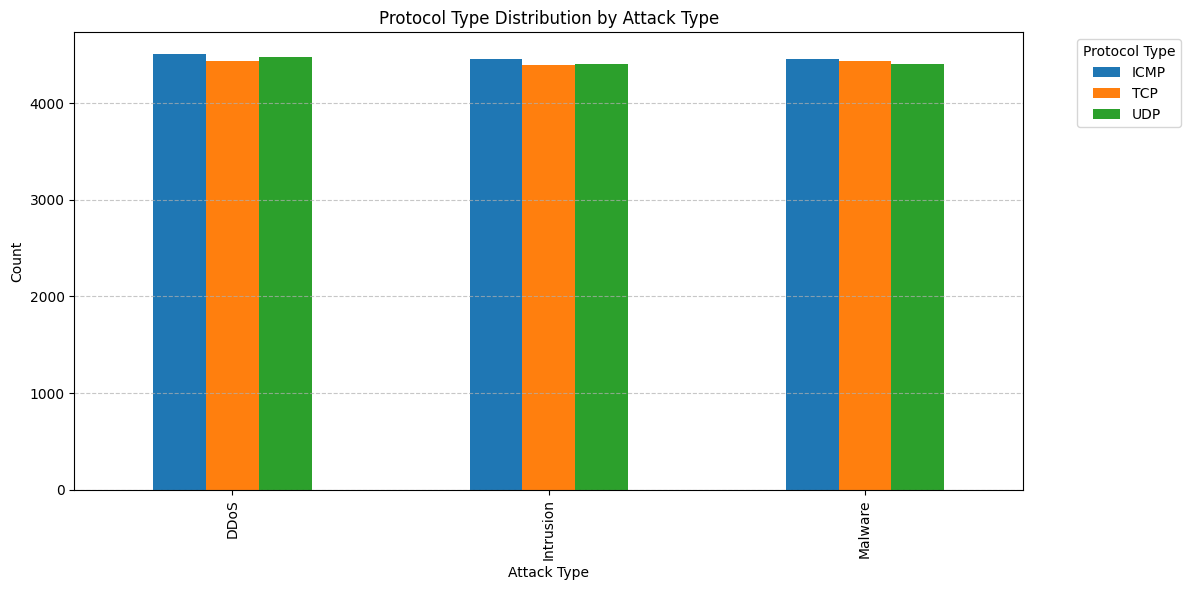

In [16]:
protocol_dist = df.groupby(['Attack Type', 'Protocol']).size().unstack(fill_value=0)

protocol_dist.plot(kind='bar', stacked=False, figsize=(12,6))

plt.title('Protocol Type Distribution by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.legend(title='Protocol Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight 5: The correlation heatmap shows the relationship between anomaly scores and packet lengths. A low correlation value suggests that anomaly scores are not strongly dependent on the size of packets. This implies that while large packets could be part of attacks, anomaly scores are determined by a wider set of behavioral factors beyond just packet size.





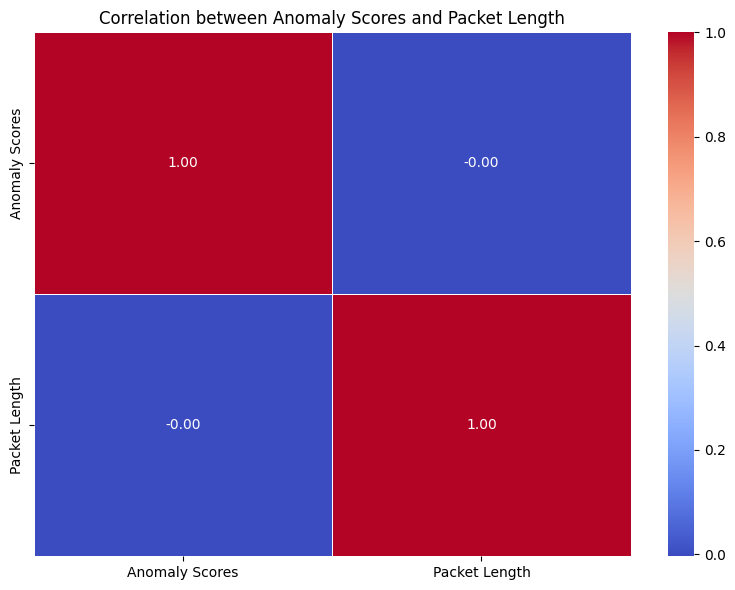

In [17]:
corr = df[['Anomaly Scores', 'Packet Length']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation between Anomaly Scores and Packet Length')
plt.tight_layout()
plt.show()